# Titanic Dataset Analysis

This notebook explores the famous Titanic dataset to understand what factors influenced passenger survival rates during the disaster.

## Step 1: Import Libraries
We start by importing the necessary Python libraries:
- **pandas**: for data manipulation and analysis
- **numpy**: for numerical operations
- **matplotlib**: for creating basic plots
- **seaborn**: for advanced statistical visualizations

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Load the Dataset
Loading the Titanic dataset from CSV file and displaying the first 5 rows to see what our data looks like.

In [74]:
df = pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 3: Dataset Information
Getting basic information about our dataset - how many rows, columns, data types, and memory usage.

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Step 4: Check for Missing Values
Finding out which columns have missing (null) values and how many are missing in each column.

In [76]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Step 5: Data Cleaning
Cleaning our data by:
- Filling missing Age values with the average age
- Filling missing Embarked values with the most common port
- Dropping the Cabin column (too many missing values)

In [77]:
df.fillna({'Age': df['Age'].mean()}, inplace=True)
df.fillna({'Embarked': df['Embarked'].mode()[0]}, inplace=True)
df.drop(['Cabin'], axis=1, inplace=True)

## Step 6: Verify Data Cleaning
Checking again for missing values to make sure our data cleaning worked properly.

In [78]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Step 7: Updated Dataset Information
Looking at the cleaned dataset information to see the changes after data cleaning.

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


## Step 8: Gender Encoding Example
Testing how to convert text values (male/female) to numbers (0/1) for analysis. This shows the mapping but doesn't save it yet.

In [80]:
df['Sex'].map({'male': 0, 'female': 1})

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

## Step 9: Survival Rate by Gender
Calculating the average survival rate for males and females to see which gender had better survival chances.

In [81]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

## Step 10: Survival Rate by Passenger Class
Calculating the average survival rate for each passenger class (1st, 2nd, 3rd) to see if wealth affected survival.

In [82]:
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

## Step 11: Gender vs Survival Visualization
Creating a count plot to show how many people survived vs died, split by gender. This gives us a visual representation of survival patterns.

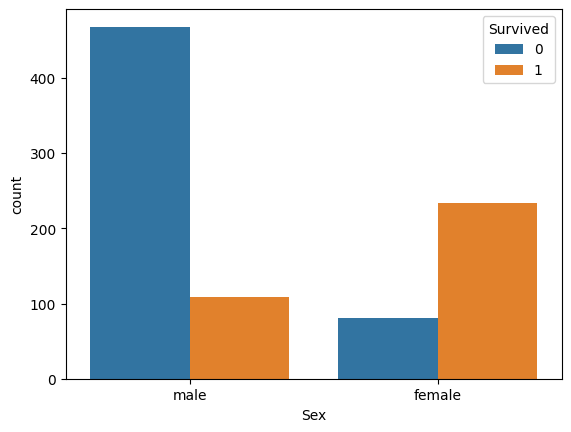

In [83]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.show()

## Step 12: Passenger Class vs Survival Visualization
Creating a count plot to show survival patterns by passenger class (1st, 2nd, 3rd class).

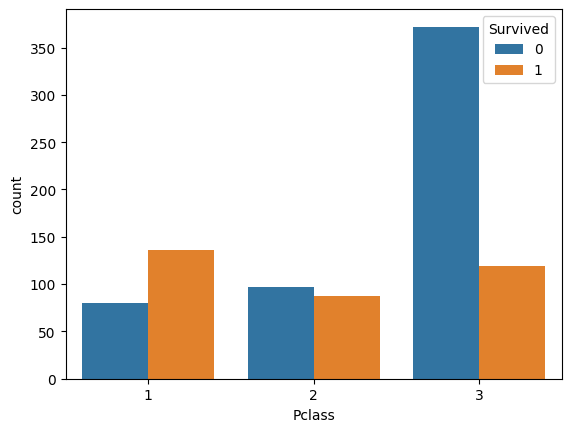

In [84]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.show()

## Step 13: Correlation Heatmap
Creating a heatmap to show how different numerical variables are related to each other. This helps us find patterns and relationships in the data.

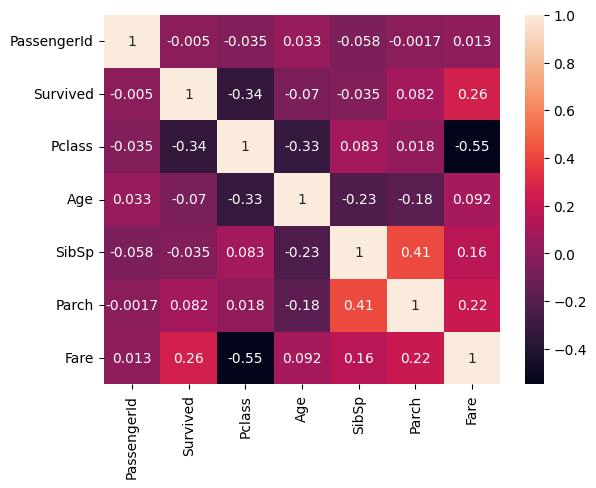

In [85]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
sns.heatmap(df[numeric_cols].corr(), annot=True)
plt.show()

## Step 14: Survival Rate by Gender (Bar Chart)
Creating a bar chart to clearly show the survival rates for males and females. This makes it easy to compare the differences.

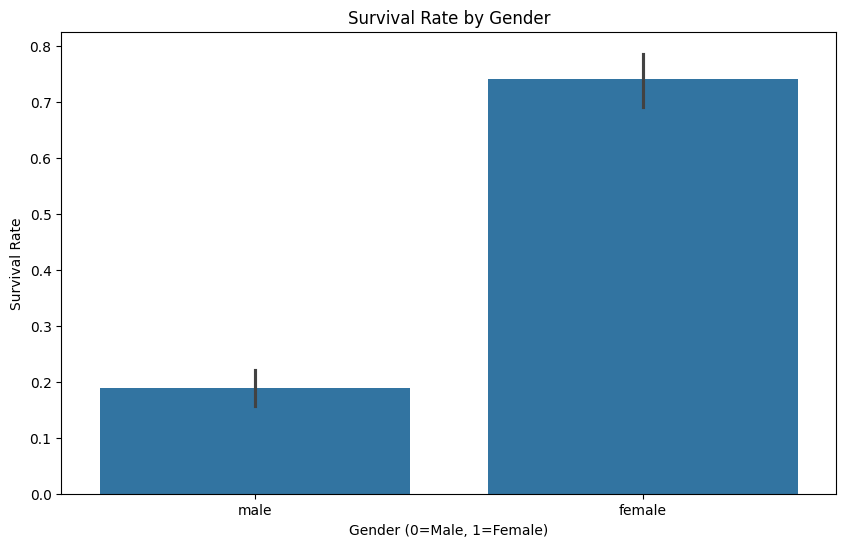

In [86]:
plt.figure(figsize=(10,6))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Gender")
plt.xlabel("Gender (0=Male, 1=Female)")
plt.ylabel("Survival Rate")
plt.show()

## Step 15: Survival Rate by Passenger Class (Bar Chart)
Creating a bar chart to show survival rates across different passenger classes, making it easy to see which class had the best survival chances.

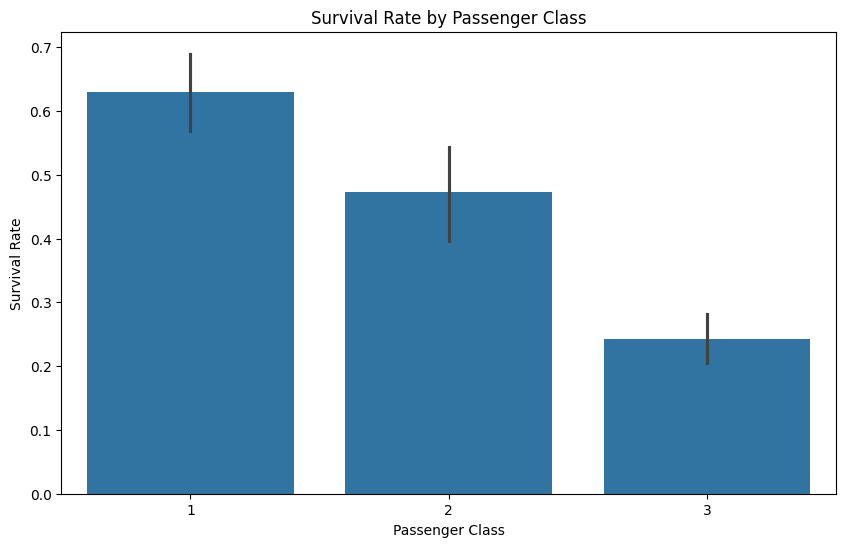

In [87]:
plt.figure(figsize=(10,6))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

## Step 16: Combined Analysis - Gender and Class Heatmap
Creating a heatmap that shows survival rates by combining both gender and passenger class. This gives us the most detailed view of who had the best and worst survival chances.

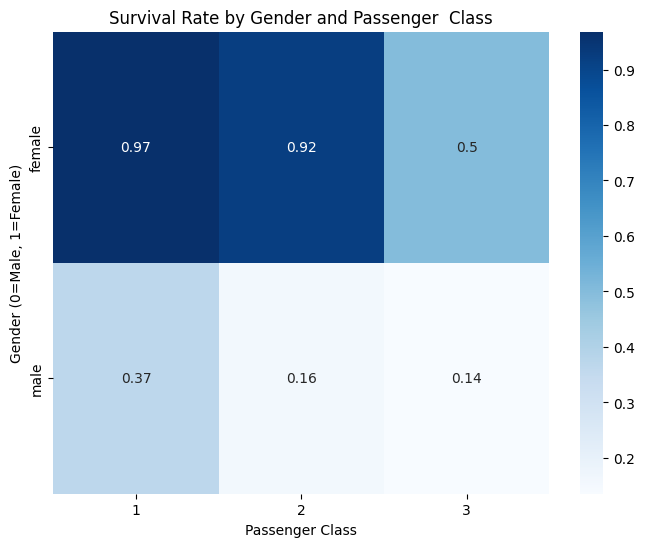

In [88]:
survival_rate = df.pivot_table(index='Sex', columns='Pclass', values='Survived')
plt.figure(figsize=(8,6))
sns.heatmap(survival_rate, annot=True, cmap='Blues')
plt.title("Survival Rate by Gender and Passenger  Class")
plt.xlabel('Passenger Class')
plt.ylabel('Gender (0=Male, 1=Female)')
plt.show()

## Summary of Analysis

Through this exploratory data analysis of the Titanic dataset, we discovered several key insights:

### Key Findings:
1. **Gender was a major factor**: Women had much higher survival rates than men
2. **Class mattered**: First-class passengers had the best survival chances, third-class had the worst
3. **Combined effect**: First-class women had the highest survival rates, while third-class men had the lowest

### Data Cleaning Steps:
- Handled missing values in Age (filled with average) and Embarked (filled with most common)
- Removed Cabin column due to too many missing values
- Verified data quality after cleaning

### Visualizations Created:
- Count plots showing survival by gender and class
- Bar charts comparing survival rates
- Correlation heatmap showing relationships between variables
- Combined heatmap showing survival by both gender and class

This analysis demonstrates the importance of data cleaning and multiple visualization techniques in uncovering patterns in historical data.